In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### 1. Изучение структуры данных.
Загружаем датасет и устанавливаем колонку с датой в качестве индекса

In [150]:
df = pd.read_csv('data.csv', delimiter=';')
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df.head()

,open,close,high,low,volume,company
time,,,,,,
2006-07-19 00:00:00+00:00,203.25,203.50,204.30,200.20,61148110,ROSN
2006-07-20 00:00:00+00:00,204.35,203.75,204.45,203.15,11412880,ROSN
2006-07-21 00:00:00+00:00,203.50,201.85,203.65,200.30,18641060,ROSN
2006-07-24 00:00:00+00:00,202.40,202.00,202.40,201.30,7941520,ROSN
2006-07-25 00:00:00+00:00,203.30,202.60,203.75,202.00,16748340,ROSN


Информация о датасете

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28889 entries, 2006-07-19 00:00:00+00:00 to 2024-10-24 00:00:00+00:00
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   open     28889 non-null  float64
 1   close    28889 non-null  float64
 2   high     28889 non-null  float64
 3   low      28889 non-null  float64
 4   volume   28889 non-null  int64  
 5   company  28889 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 1.5+ MB


Описание числовых характеристик

In [152]:
df.describe()

,open,close,high,low,volume
count,28889.000000,28889.000000,28889.000000,28889.000000,2.888900e+04
mean,808.259461,808.200599,818.179511,797.415978,1.086280e+07
std,1374.247049,1374.232704,1389.169619,1357.565566,3.258655e+07
min,8.950000,8.610000,9.400000,8.510000,1.000000e+03
25%,138.000000,138.100000,139.980000,136.200000,5.667100e+05
50%,248.990000,248.750000,251.850000,245.550000,1.565940e+06
75%,686.300000,686.300000,694.600000,676.800000,3.935752e+06
max,8152.500000,8152.000000,8175.000000,8080.000000,5.598712e+08


Колонки:
- open - цена открытия
- close - цена закрытия
- high - максимальная цена
- low - минимальная цена
- volume - объем торгов
- time - время торгов
- company - тикер компании

Тикеры:
- ROSN - Роснефть
- GAZP - Газпром
- LKOH - Лукойл
- NVTK - Новатэк
- SNGS - Сургутнефтегаз
- TATN - Татнефть

Проверка количества пропусков в каждом столбце

In [153]:
df.isnull().sum()

open       0
close      0
high       0
low        0
volume     0
company    0
dtype: int64

Создаем отдельные датафреймы для каждого тикера для удобства использования

In [154]:
tickers = ['ROSN', 'GAZP', 'LKOH', 'NVTK', 'SNGS', 'TATN']
ROSN = pd.DataFrame()
GAZP = pd.DataFrame()
LKOH = pd.DataFrame()
NVTK = pd.DataFrame()
SNGS = pd.DataFrame()
TATN = pd.DataFrame()

for stock in tickers:
    globals()[stock] = df[df['company'] == stock].drop(columns=['company'])

Отобразим цены закрытий акций Лукойла за весь период

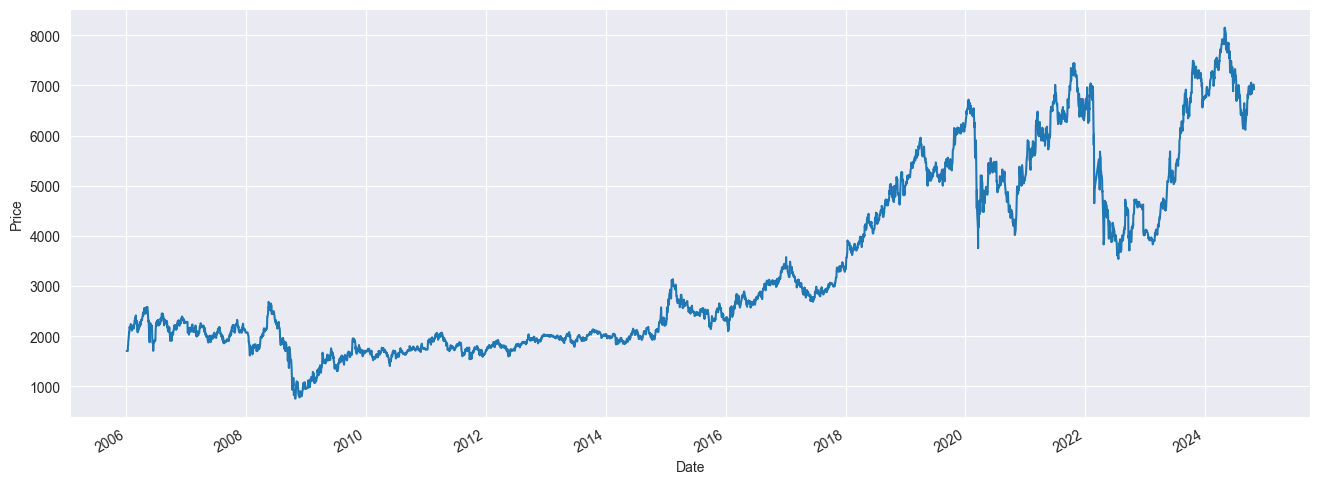

In [155]:
LKOH['close'].plot(figsize = (16, 6))
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

Отобразим объем торгов за день акций Лукойла за весь период

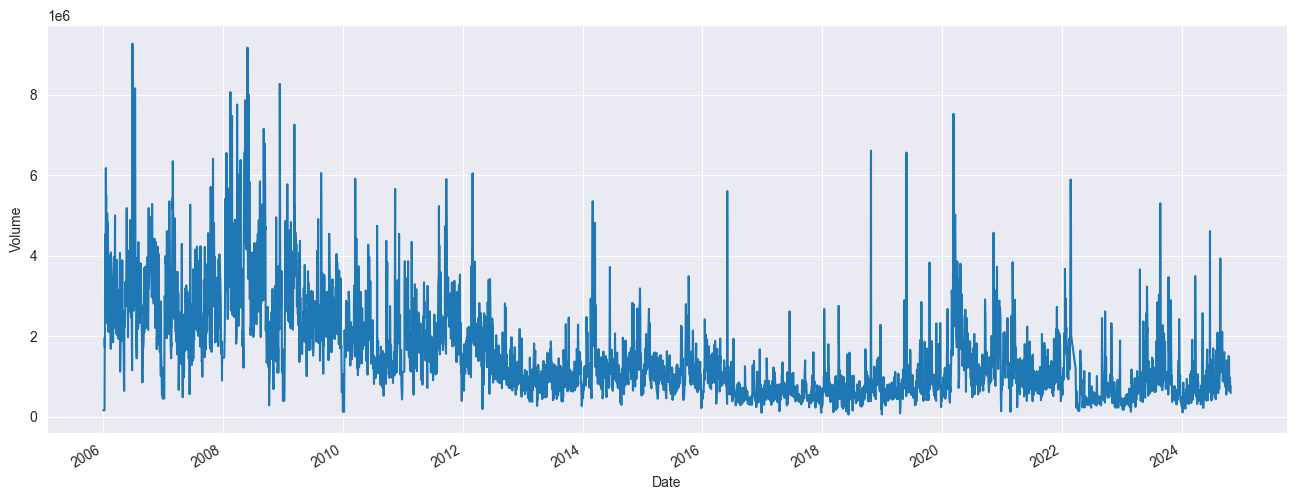

In [156]:
LKOH['volume'].plot(figsize=(16,6))
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

Построим график со скользящими средними за 10, 50 и 100 дней и ценой акции при закрытии торгов

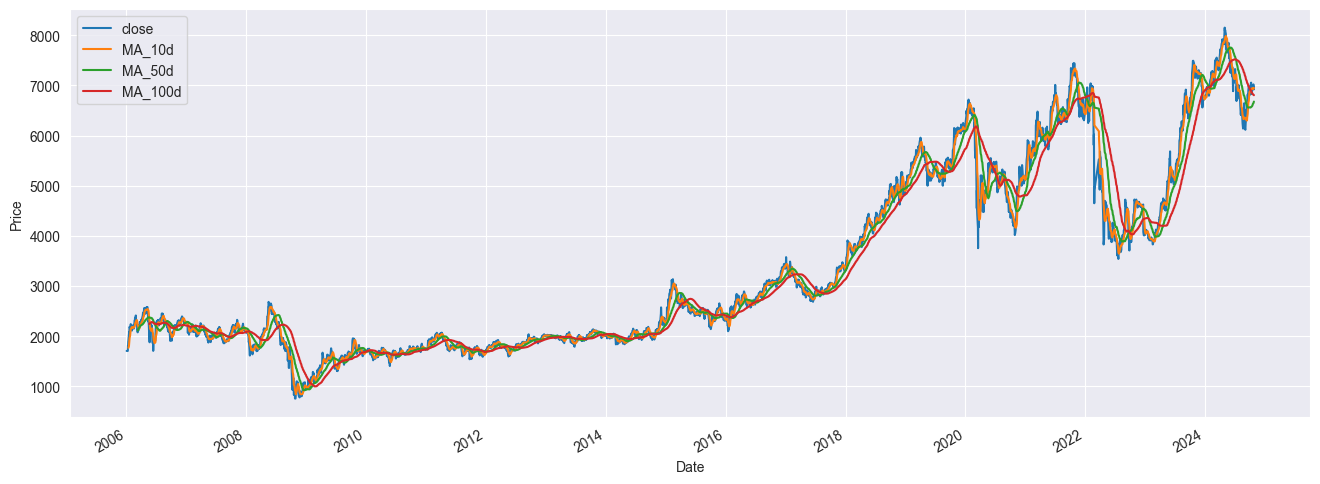

In [157]:
ma_day = [10, 50, 100]

for ma in ma_day:
    column_name = f"MA_{str(ma)}d"
    LKOH[column_name] = pd.DataFrame.rolling(LKOH['close'], ma).mean()

LKOH[['close', 'MA_10d', 'MA_50d', 'MA_100d']].plot(figsize=(16, 6))
LKOH.drop(columns=['MA_10d', 'MA_50d', 'MA_100d'], inplace=True)
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

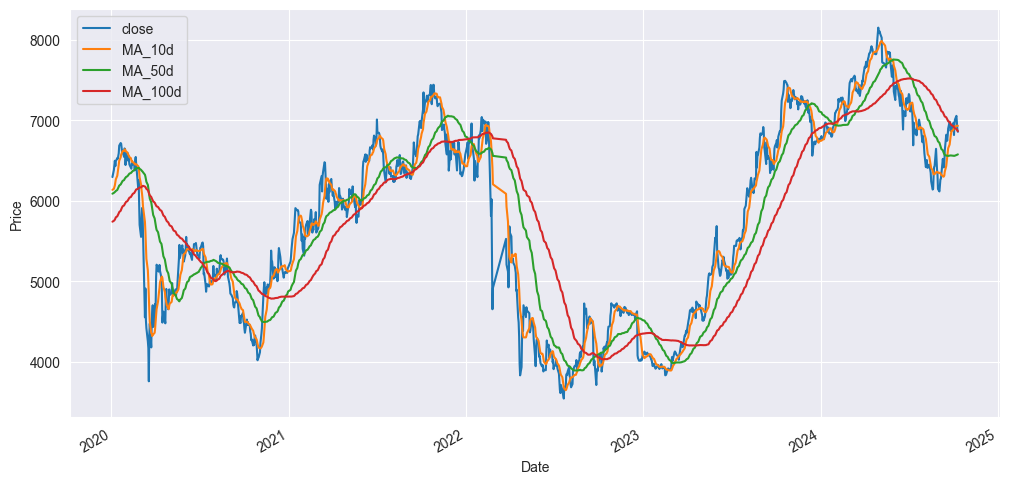

In [158]:
start_date = '2020-01-01'
end_date = '2024-10-10'

filtered_data = LKOH.copy()

ma_day = [10, 50, 100]
for ma in ma_day:
    column_name = f"MA_{str(ma)}d"
    filtered_data[column_name] = filtered_data['close'].rolling(ma).mean()

filtered_data = filtered_data.loc[start_date:end_date]

filtered_data[['close', 'MA_10d', 'MA_50d', 'MA_100d']].plot(figsize=(12, 6))
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

Добавим информацию о стоимости нефти марки BRENT

In [159]:
brent_data = pd.read_csv('brent_data.csv')
brent_data['time'] = pd.to_datetime(brent_data['time'])
brent_data.set_index('time', inplace=True)
brent_data.head()

,brent_price
time,
2007-07-30 00:00:00+00:00,75.739998
2007-07-31 00:00:00+00:00,77.050003
2007-08-01 00:00:00+00:00,75.349998
2007-08-02 00:00:00+00:00,75.760002
2007-08-03 00:00:00+00:00,74.750000


In [160]:
# brent_data.rename(columns={'brent_price':'close'}, inplace=True)
# brent_data.head()

In [161]:
merged_data = LKOH.join(brent_data[['brent_price']], how='left')

ma_day = [10, 50, 100]
for ma in ma_day:
    column_name = f"MA for {ma} days"
    merged_data[column_name] = merged_data['close'].rolling(window=ma).mean()

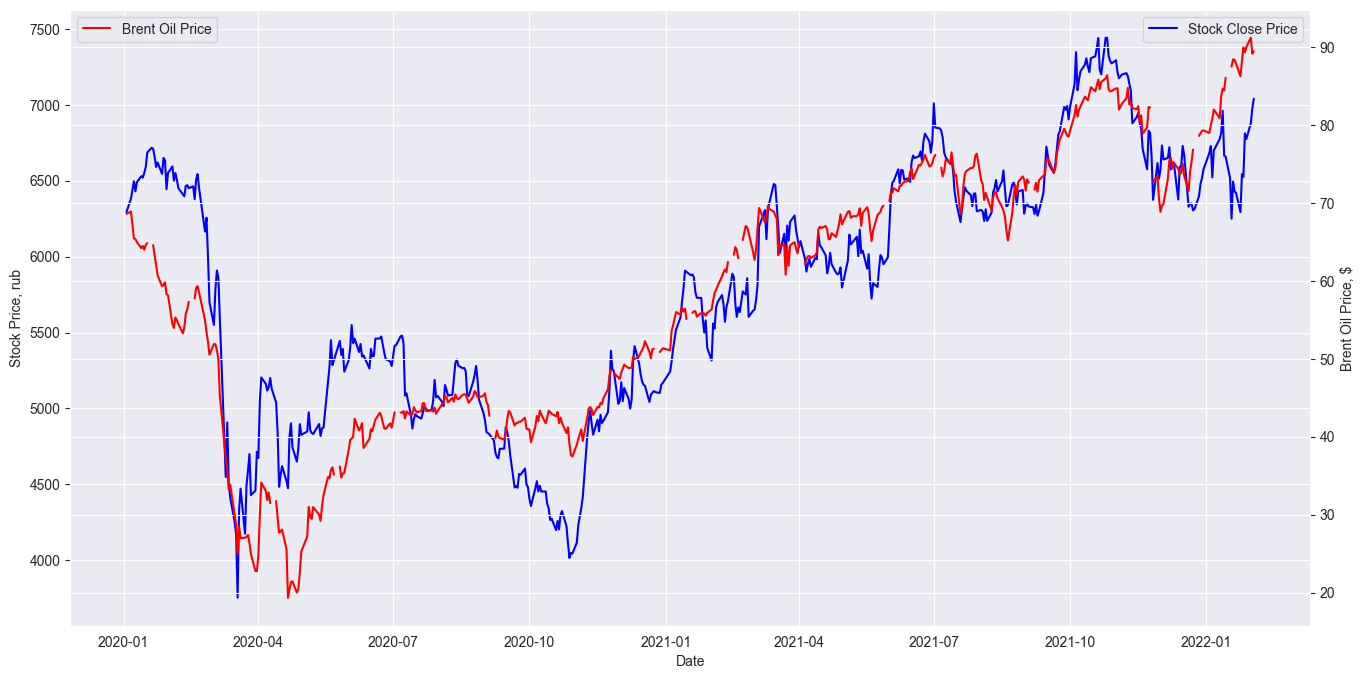

In [162]:
start_date = '2020-01-01'
end_date = '2022-02-02'
merged_data_new = merged_data.loc[start_date:end_date]

fig, ax1 = plt.subplots(figsize=(16, 8))


ax1.plot(merged_data_new.index, merged_data_new['close'], label='Stock Close Price', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price, rub')
ax1.tick_params(axis='y')
ax1.legend()

ax2 = ax1.twinx()
ax2.plot(merged_data_new.index, merged_data_new['brent_price'], label='Brent Oil Price', color='red')
ax2.set_ylabel('Brent Oil Price, $')
ax2.tick_params(axis='y')
ax2.legend()

plt.show()

Посчитаем корреляцию цены нефти и стоимости акции Лукойл за весь период

In [163]:
corr = merged_data[['close', 'brent_price']].corr(method='spearman')
corr

,close,brent_price
close,1.000000,-0.285314
brent_price,-0.285314,1.000000


Посчитаем корреляцию цены нефти и стоимости акции Лукойл в период с 2020-01-01 по 2022-02-02'

In [164]:
start_date = '2020-01-01'
end_date = '2022-02-02'
merged_data_new = merged_data.loc[start_date:end_date]

corr = merged_data_new[['close', 'brent_price']].corr(method='spearman')
corr

,close,brent_price
close,1.000000,0.903719
brent_price,0.903719,1.000000


Можно заметить, что за весь период стоимость нефти Brent слабо коррелирует с ценой акции Лукойла, но в определенные моменты это значение достаточно высоко, на такие временные промежутки стоит обратить внимание при создание модели

Выведем даты с самым большим изменением цены акции за день. В будущем на эти даты стоит обратить внимание при построение модели. Также стоит добавить в данные даты назначения диведендов, тк цены акций в эти дни сильно меняются.

In [165]:
LKOH_daily_change = LKOH.copy()
LKOH_daily_change['daily_change'] = LKOH_daily_change['close'] - LKOH_daily_change['open']

top_daily_changes = LKOH_daily_change.reindex(LKOH_daily_change['daily_change'].abs().nlargest(15).index)

top_daily_changes = top_daily_changes.reset_index()
top_daily_changes['time'] = pd.to_datetime(top_daily_changes['time'])
top_daily_changes.set_index('time', inplace=True)
top_daily_changes[['daily_change']].head(10)

,daily_change
time,
2022-02-24 00:00:00+00:00,-760.5
2022-02-21 00:00:00+00:00,-670.0
2022-03-31 00:00:00+00:00,560.0
2022-02-25 00:00:00+00:00,515.0
2020-03-19 00:00:00+00:00,503.0
2020-03-10 00:00:00+00:00,-484.0
2022-09-01 00:00:00+00:00,472.0
2022-09-20 00:00:00+00:00,-423.0
2020-04-22 00:00:00+00:00,394.0


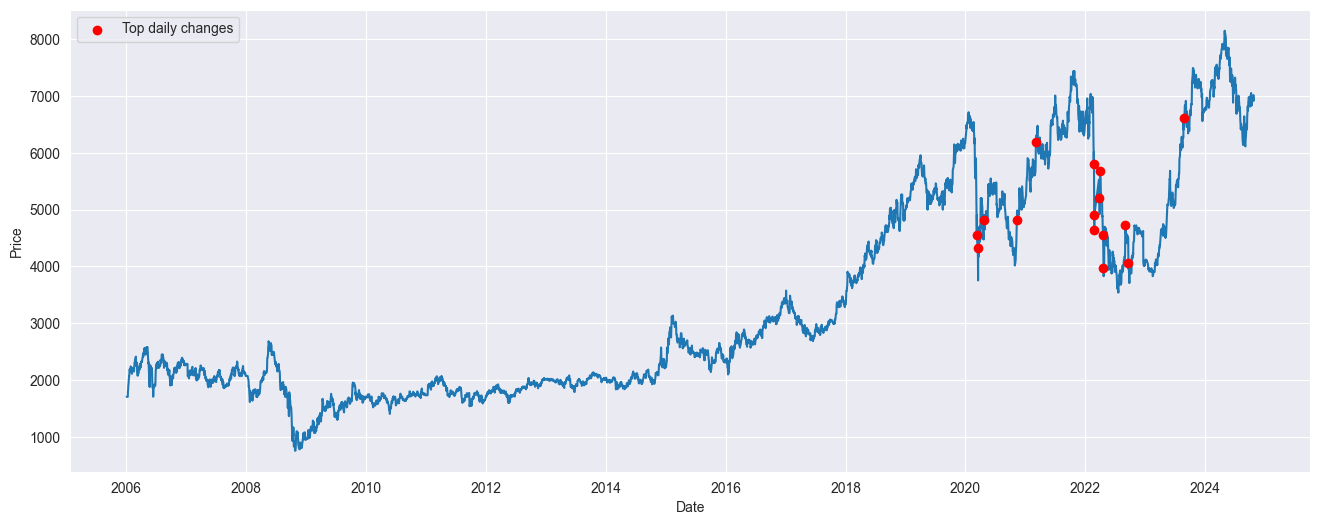

In [166]:
plt.figure(figsize=(16, 6))
plt.plot(LKOH.index, LKOH['close'])
plt.scatter(top_daily_changes.index, top_daily_changes['close'], color='red', label='Top daily changes', zorder=2)

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Создадим датафрейм с относительными изменениями по сравнению с предыдущей строкой

In [167]:
# Список тикеров и соответствующих датафреймов
tickers = {
    'ROSN': ROSN,
    'GAZP': GAZP,
    'LKOH': LKOH,
    'NVTK': NVTK,
    'SNGS': SNGS,
    'TATN': TATN,
    'BRENT': brent_data.rename(columns={'brent_price':'close'})
}

closing_df = pd.concat([pd.DataFrame(df['close']).rename(columns={'close': ticker}) for ticker, df in tickers.items()], axis=1)

start_date = '2007-07-30'
end_date = '2024-10-10'
closing_df = closing_df.loc[start_date:end_date]

closing_df.head(10)

,ROSN,GAZP,LKOH,NVTK,SNGS,TATN,BRENT
time,,,,,,,
2007-07-30 00:00:00+00:00,209.80,272.06,2034.5,138.8,29.23,126.7,75.739998
2007-07-31 00:00:00+00:00,213.35,275.13,2054.5,139.0,29.17,127.4,77.050003
2007-08-01 00:00:00+00:00,207.90,270.14,1997.0,136.6,28.63,125.0,75.349998
2007-08-02 00:00:00+00:00,209.75,273.26,2008.0,136.4,28.85,126.4,75.760002
2007-08-03 00:00:00+00:00,209.55,277.08,2021.0,135.8,28.58,127.4,74.750000
2007-08-06 00:00:00+00:00,207.60,271.73,1980.0,133.4,28.50,125.1,71.169998
2007-08-07 00:00:00+00:00,208.50,272.74,1969.5,134.6,28.37,124.5,71.800003
2007-08-08 00:00:00+00:00,211.95,279.81,2016.5,137.0,29.36,127.9,70.989998
2007-08-09 00:00:00+00:00,207.35,271.59,1960.5,133.0,28.53,123.8,70.209999


In [168]:
tech_returns = closing_df.pct_change()
tech_returns = tech_returns.dropna()
tech_returns

,ROSN,GAZP,LKOH,NVTK,SNGS,TATN,BRENT
time,,,,,,,
2007-07-31 00:00:00+00:00,0.016921,0.011284,0.009830,0.001441,-0.002053,0.005525,0.017296
2007-08-01 00:00:00+00:00,-0.025545,-0.018137,-0.027987,-0.017266,-0.018512,-0.018838,-0.022064
2007-08-02 00:00:00+00:00,0.008899,0.011550,0.005508,-0.001464,0.007684,0.011200,0.005441
2007-08-03 00:00:00+00:00,-0.000954,0.013979,0.006474,-0.004399,-0.009359,0.007911,-0.013332
2007-08-06 00:00:00+00:00,-0.009306,-0.019309,-0.020287,-0.017673,-0.002799,-0.018053,-0.047893
...,...,...,...,...,...,...,...
2024-10-04 00:00:00+00:00,0.003800,-0.004108,0.007619,0.006240,-0.002720,0.015562,0.005540
2024-10-07 00:00:00+00:00,0.003188,0.001350,0.006563,-0.006201,0.022794,0.004248,0.036899
2024-10-08 00:00:00+00:00,-0.003376,0.002472,-0.011552,-0.007850,-0.006857,-0.059375,-0.046336


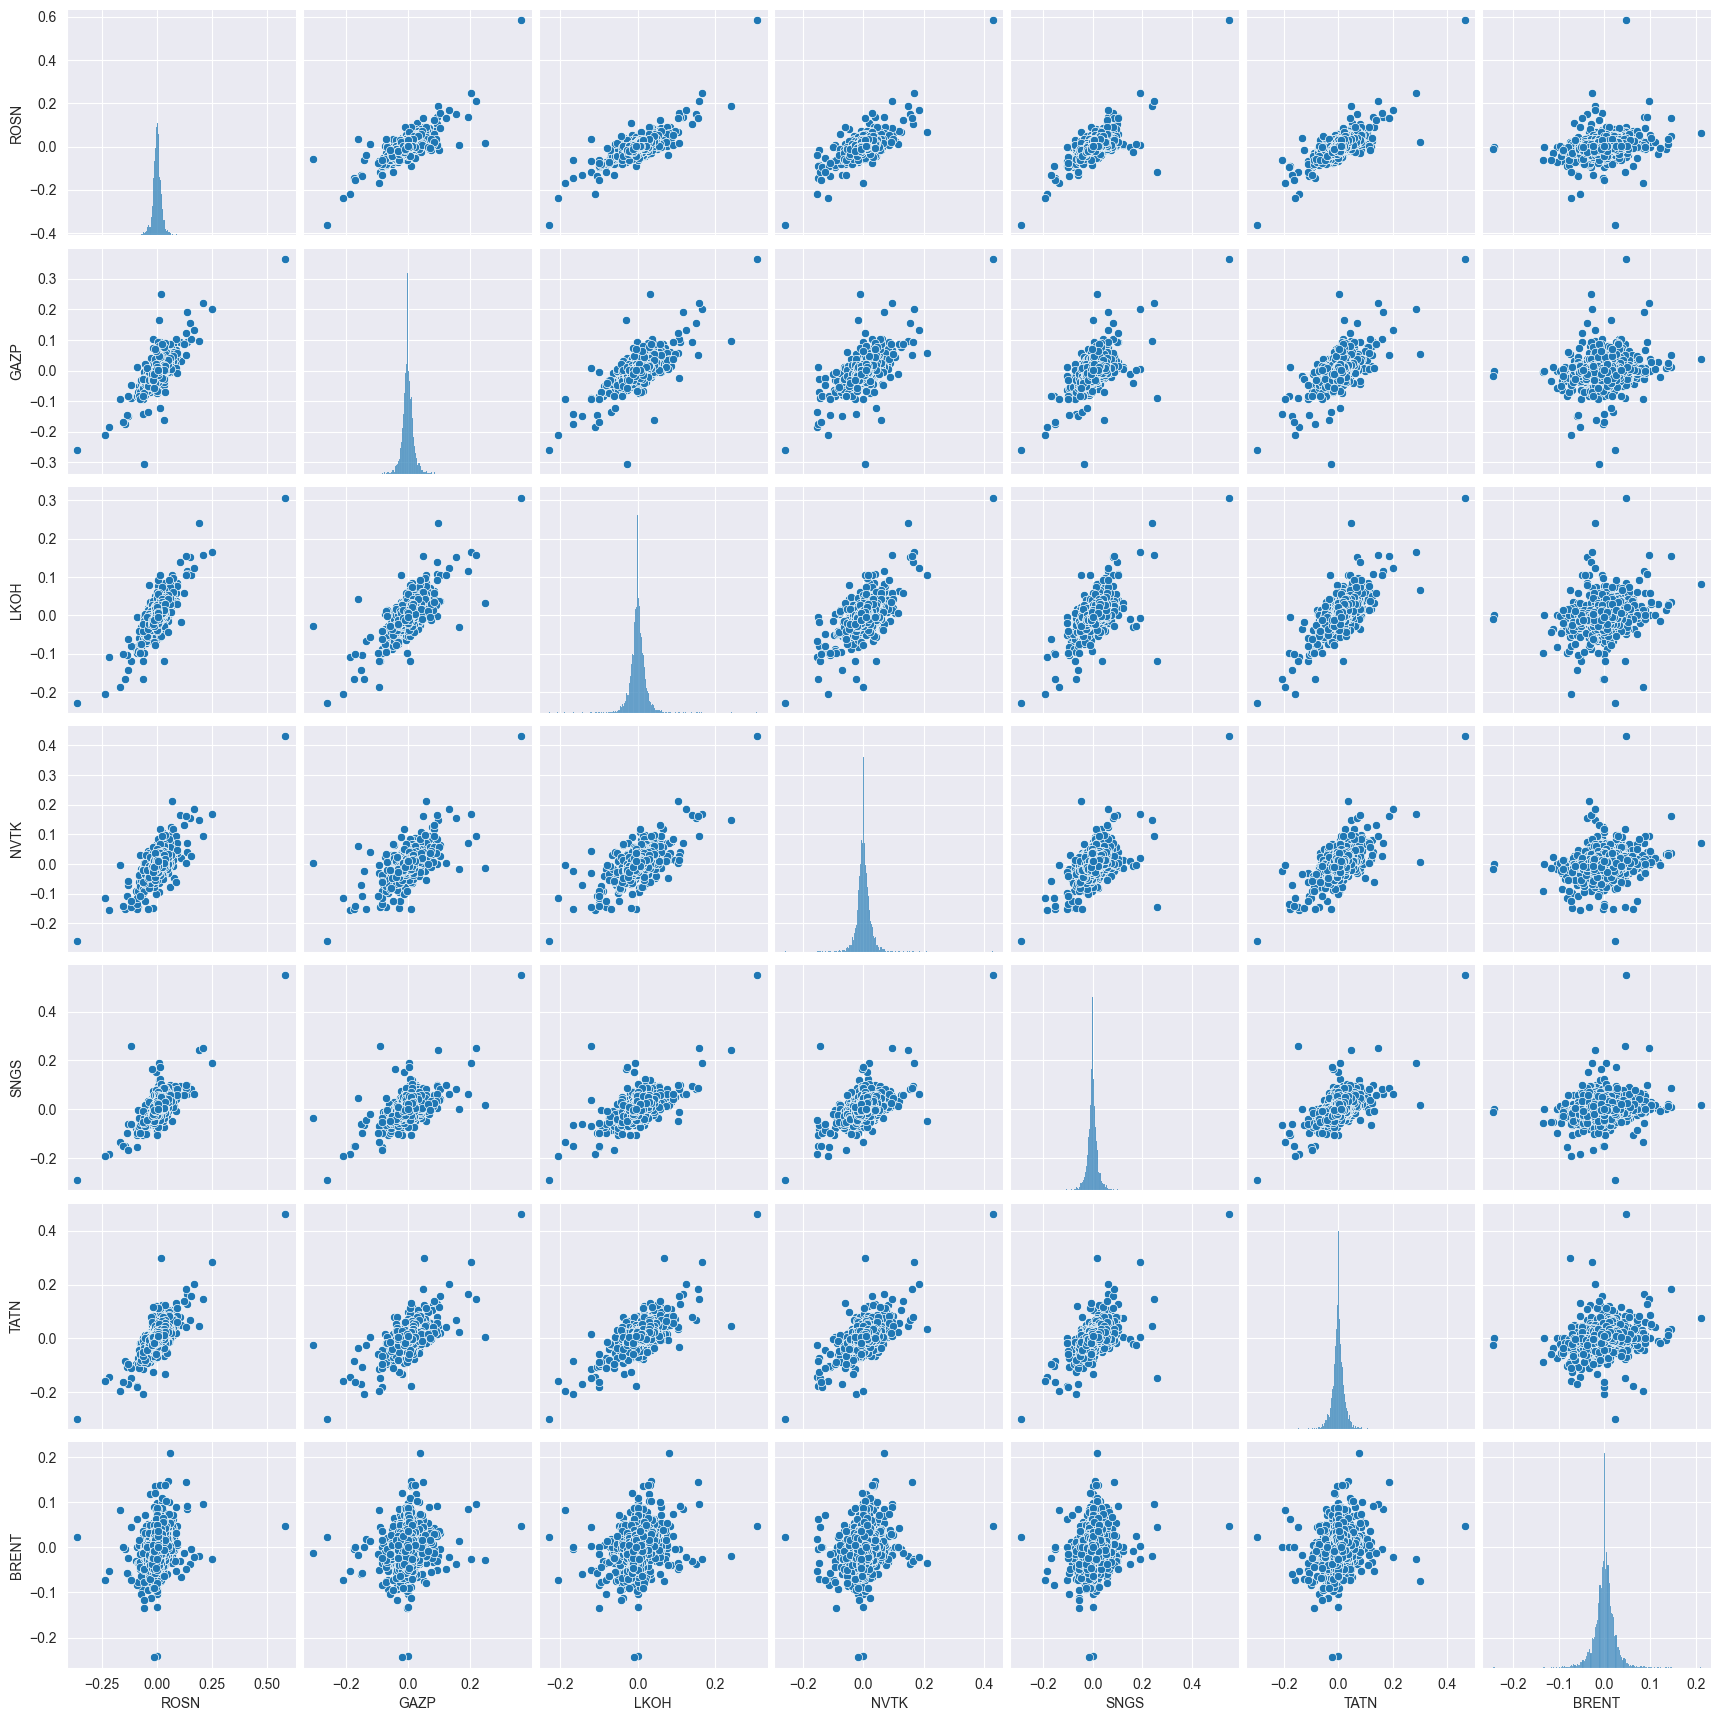

In [169]:
sns.pairplot(tech_returns.dropna())
plt.show()

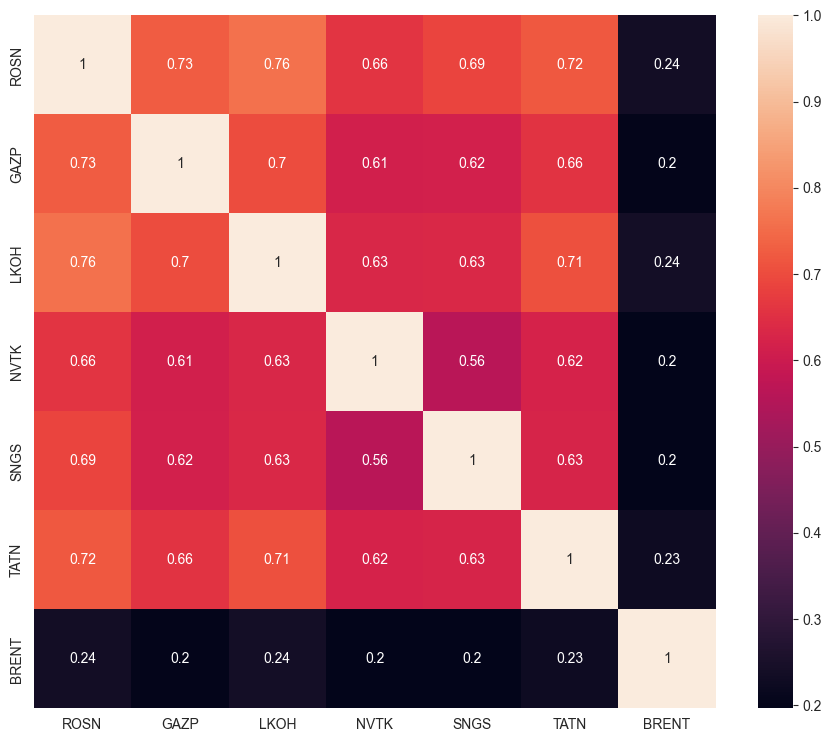

In [170]:
_, ax = plt.subplots(figsize=(11, 9))

corr = tech_returns.dropna().corr()

sns.heatmap(corr, annot = True)
plt.show()


### Выводы по корреляционной тепловой карте
- Акции крупных нефтегазовых компаний (ROSN, GAZP, LKOH, TATN) имеют высокую корреляцию между собой, указывая на схожие рыночные факторы.
- Корреляция акций с нефтью Brent низкая

Построение графиков цен закрытия и скользящих средних для каждого тикера в период с 2020-01-01 по 2024-10-10

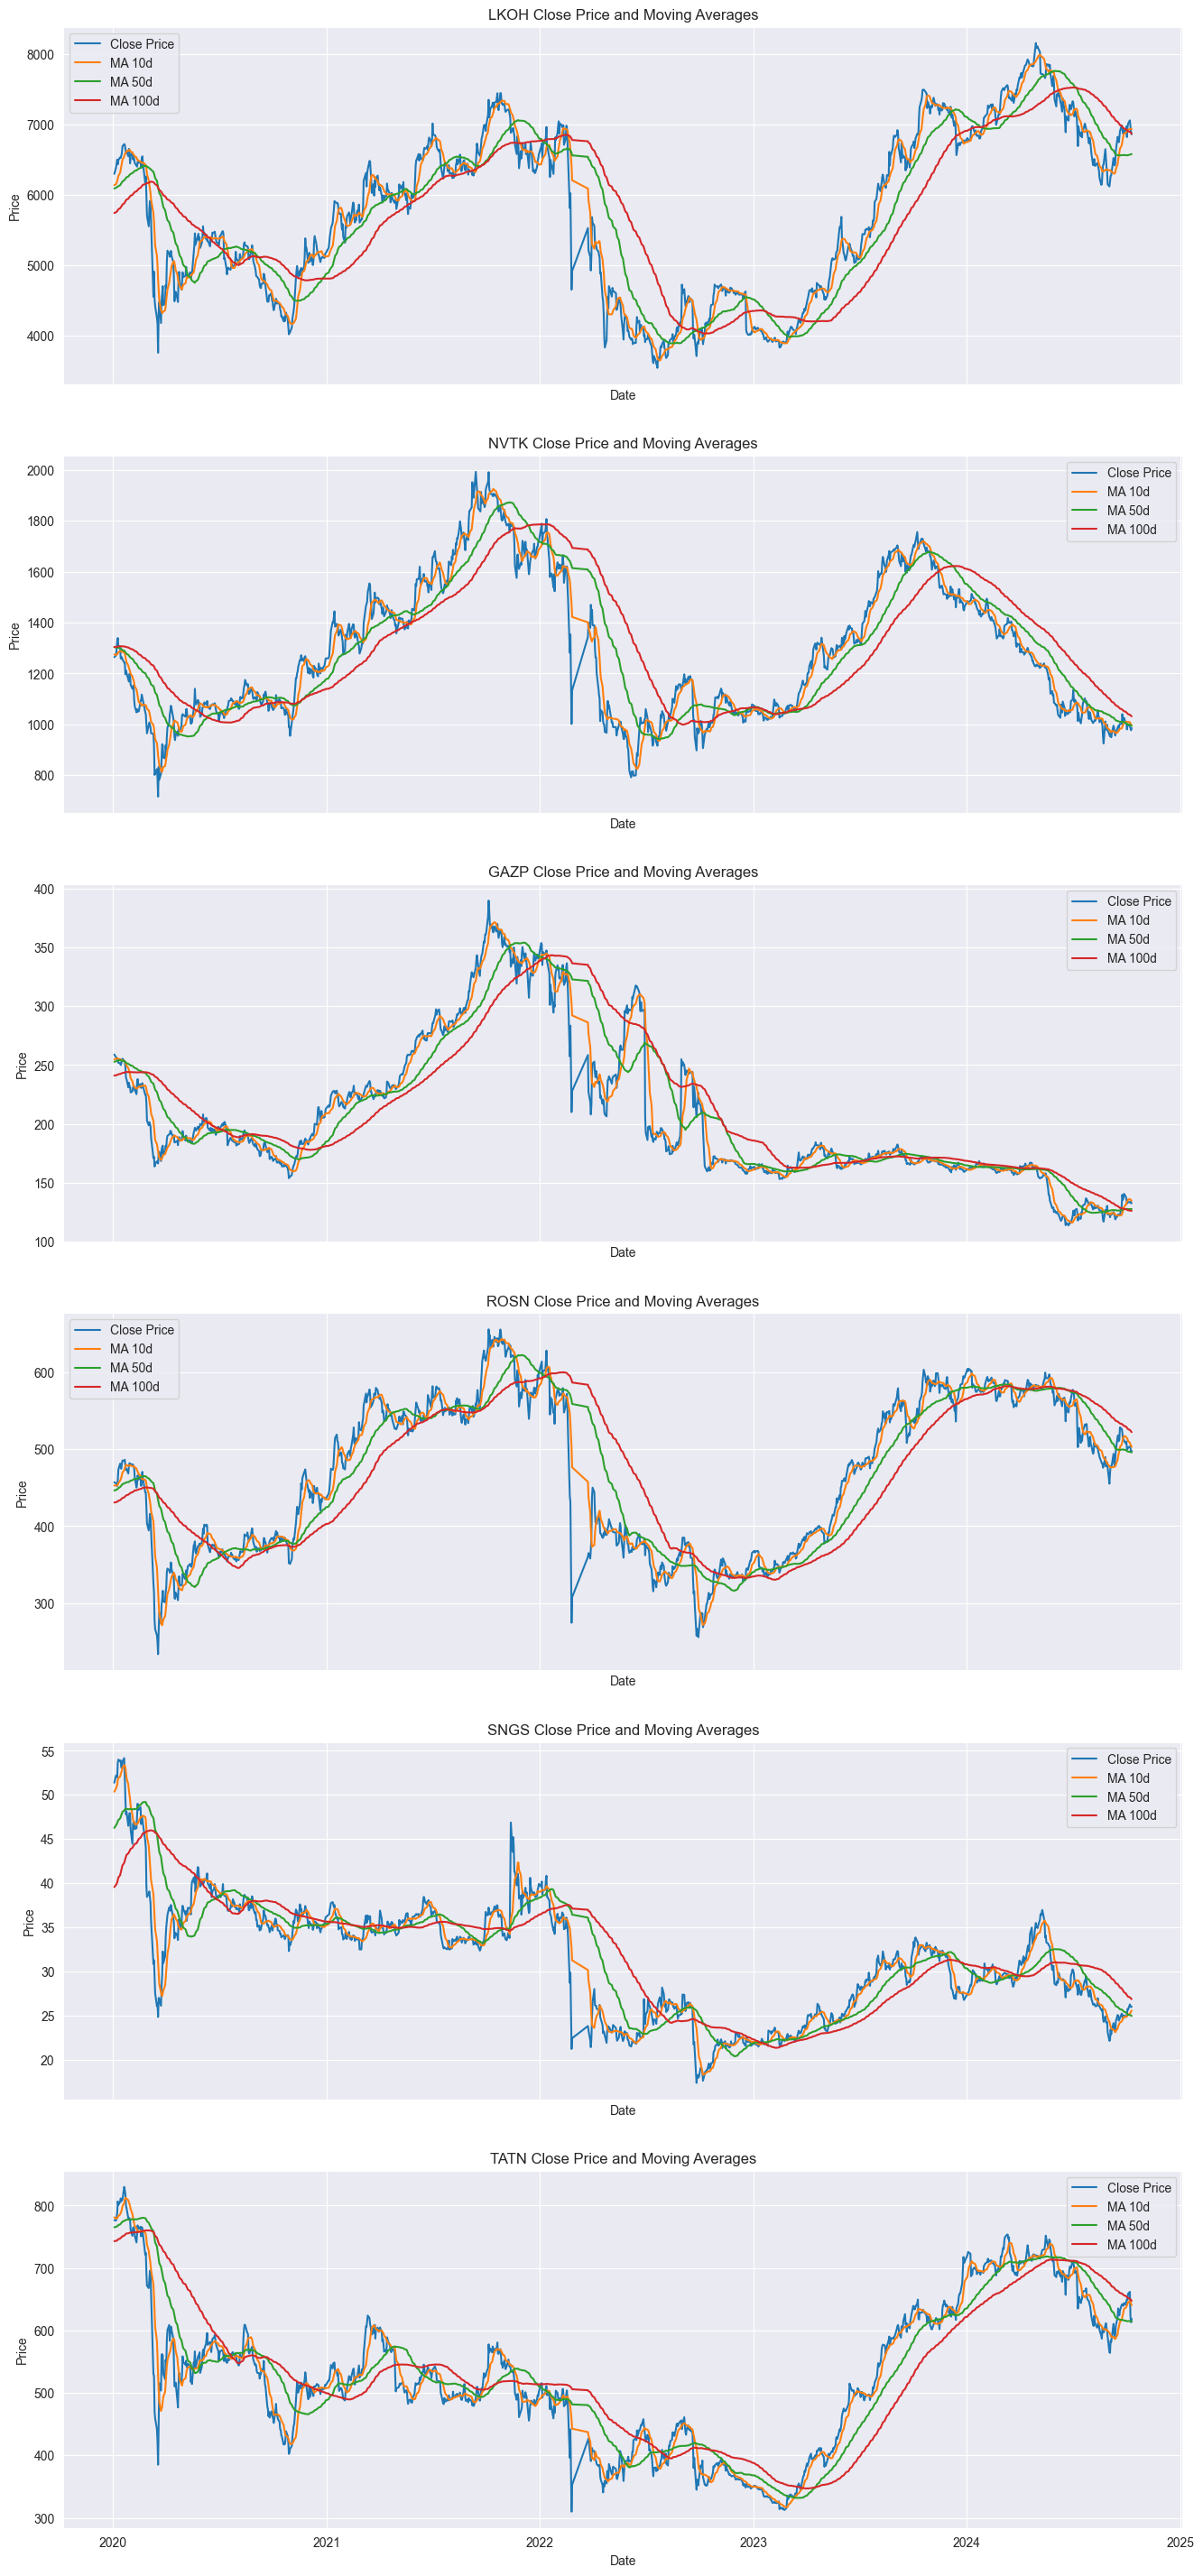

In [171]:
tickers = ['LKOH', 'NVTK', 'GAZP', 'ROSN', 'SNGS', 'TATN']
start_date = '2020-01-01'
end_date = '2024-10-10'

dataframes = {ticker: globals()[ticker] for ticker in tickers if ticker in globals()}

_, axes = plt.subplots(len(dataframes), 1, figsize=(16, 6 * len(dataframes)), sharex=True)

for i, (ticker, df) in enumerate(dataframes.items()):
    ma_day = [10, 50, 100]
    for ma in ma_day:
        column_name = f"MA_{str(ma)}d"
        df[column_name] = df['close'].rolling(ma).mean()

    df = df.loc[start_date:end_date]
    axes[i].plot(df.index, df['close'], label='Close Price')
    for ma in ma_day:
        axes[i].plot(df.index, df[f'MA_{ma}d'], label=f'MA {ma}d')

    axes[i].set_title(f"{ticker} Close Price and Moving Averages")
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Price")
    axes[i].legend()

plt.show()


In [172]:
stats_summary = {}

for ticker, df in dataframes.items():
    stats = {
        'mean': df['close'].mean(),
        'median': df['close'].median(),
        'std_dev': df['close'].std(),
        'min': df['close'].min(),
        'max': df['close'].max()
    }
    stats_summary[ticker] = stats

stats_summary_df = pd.DataFrame(stats_summary).T
stats_summary_df.columns = ['Mean', 'Median', 'Std Dev', 'Min', 'Max']

print(stats_summary_df)


             Mean    Median      Std Dev     Min      Max
LKOH  3309.311093  2465.000  1803.468832  755.00  8152.00
NVTK   651.732411   503.800   477.217006   45.80  1993.00
GAZP   186.647228   163.995    61.040032   87.94   389.82
ROSN   316.034231   263.500   122.835597   82.95   655.25
SNGS    29.654560    28.740     5.836383    8.61    54.17
TATN   339.461558   294.600   213.114049   27.50   837.00


In [173]:
volatility_summary = {}

for ticker, df in dataframes.items():
    df['log_return'] = np.log(df['close'] / df['close'].shift(1))

    volatility = df['log_return'].std() * np.sqrt(252)  # Годовая волатильность, предполагая 252 торговых дня

    volatility_summary[ticker] = volatility

volatility_summary_df = pd.DataFrame(volatility_summary, index=['Volatility']).T

print(volatility_summary_df)

      Volatility
LKOH    0.348177
NVTK    0.394765
GAZP    0.373699
ROSN    0.380708
SNGS    0.399283
TATN    0.424726


### Вывод
Анализ показал высокую корреляцию между акциями российских энергетических компаний, что указывает на схожие рыночные факторы. В то же время, общая корреляция с ценой на нефть Brent низкая, хотя в отдельные моменты времени их движения синхронизируются. Для более точного понимания динамики цен стоит учитывать финансовую отчетность компаний, которая может выявить дополнительные факторы, влияющие на их рыночное поведение.